In [7]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#create a set of random latitude and longtitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size=1500)

lat_lngs = zip(lats,lngs)

lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
for coordinate in coordinates:
        print(coordinate[0], coordinate[1])

-63.160694139484434 56.78064703593063
-21.805960556233416 15.721899421876174
81.62427867601514 -112.44255887118044
-83.68976982697586 -51.69845360946178
-46.18834191024514 168.08921598454128
54.25298434722208 -45.94886432686769
-32.62730970091987 -89.25534728238536
-28.998933129853647 129.0993925808218
86.93713599073737 71.62102940731856
-49.61986237527939 143.63649296347222
-73.77016640663061 -160.42342963579512
-44.876710754418085 170.53817922231042
-83.57817920242286 -83.7601679274511
-7.050311525217978 105.59380580181062
63.05568975465005 100.01430083336749
53.56926768789768 -90.90030195807545
68.40643522757995 -21.91117931445845
-70.34221509381013 78.90498103545275
82.52743230409777 -92.05131633383186
-65.75702877954038 -172.58010098293957
-33.275676590283084 -119.83562347269697
-44.391372984172314 146.59287037659476
7.353563142997686 159.63627010911551
63.73572199244475 -72.91059657487853
55.85617093275113 -80.10798071143287
31.70297810076775 2.8506655011275654
-3.323410173322273

In [17]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [18]:
#use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
        citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

taolanaro mg
karibib na
yellowknife ca
ushuaia ar
otautau nz
nanortalik gl
lebu cl
yulara au
dikson ru
new norfolk au
mataura pf
ranfurly nz
ushuaia ar
labuhan id
tura ru
sioux lookout ca
illoqqortoormiut gl
busselton au
qaanaaq gl
vaini to
rikitea pf
new norfolk au
namatanai pg
iqaluit ca
attawapiskat ca
warqla dz
kindu cd
atambua id
arraial do cabo br
otane nz
powell us
ugoofaaru mv
adilcevaz tr
chuy uy
trincomalee lk
ushuaia ar
kahului us
ipeti pa
bindura zw
sao joao da barra br
saleaula ws
rikitea pf
acapulco mx
sentyabrskiy ru
honiara sb
airai pw
esperance au
illoqqortoormiut gl
vaini to
port alfred za
busselton au
taolanaro mg
japura br
leningradskiy ru
otkaznoye ru
cobija bo
dibaya cd
correntina br
nikolskoye ru
shelburne ca
vila velha br
hithadhoo mv
beringovskiy ru
onega ru
saleaula ws
hermanus za
hermanus za
taolanaro mg
mar del plata ar
jamestown sh
leningradskiy ru
sterling us
mount gambier au
khatanga ru
punta arenas cl
ixtapa mx
atuona pf
sobolevo ru
jasper ca
jamestown s

hilo us
puerto ayora ec
port elizabeth za
taolanaro mg
castro cl
puerto ayora ec
mataura pf
the valley ai
la ronge ca
samarai pg
thompson ca
butaritari ki
kruisfontein za
srednekolymsk ru
jumla np
tuktoyaktuk ca
punta arenas cl
kaduqli sd
albany au
rikitea pf
castro cl
salalah om
hobart au
katsuura jp
isangel vu
puerto ayora ec
punta arenas cl
husavik is
dillon us
victoria sc
torbay ca
saint-georges gf
katobu id
arraial do cabo br
victoria sc
andenes no
taolanaro mg
punta arenas cl
mitsamiouli km
tuktoyaktuk ca
lavrentiya ru
gornopravdinsk ru
taolanaro mg
busselton au
vaini to
dawlatabad af
ushuaia ar
isangel vu
albany au
provideniya ru
copperas cove us
orange walk bz
rikitea pf
chuy uy
solhan tr
ribeira grande pt
bouna ci
muddebihal in
tasiilaq gl
mys shmidta ru
ahipara nz
sharjah ae
hermanus za
qaanaaq gl
hermanus za
amderma ru
los llanos de aridane es
rikitea pf
carnarvon au
butaritari ki
mataura pf
corowa au
samusu ws
naze jp
mahebourg mu
college us
mataura pf
lixourion gr
georgeto

In [19]:
#Create a list for holdings the cities
cities = []

#identify the nearest city for each latitude and longitute combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)
    

597

In [8]:
# Import the requests library.
import requests

# Import the API key.
#from config import weather_api_key

In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" 
#+ weather_api_key


In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [24]:
#Create an empty list to hold the weather data
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval       ")
print("-------------------------------")

#create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
#for i in range(len(cities)):

for i, city in enumerate(cities):
    
    #Group cities in sets of 50 since we can only call 60 times per minute for the free version
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    #Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
    #if an error is experienced, skip the city
    except:
        print("City not found. Skipping ...")
    
    #except Exception as e:
        #print(e)     
        pass
    
#Indicate data loading is complete
print("-------------------------------")
print("Data Retrieval Complete        ")
print("-------------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping ...
Processing Record 2 of Set 1 | karibib
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | otautau
Processing Record 6 of Set 1 | nanortalik
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | yulara
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | ranfurly
Processing Record 13 of Set 1 | labuhan
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | sioux lookout
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping ...
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | namatanai
Processing Record 22 of 

Processing Record 35 of Set 4 | xiaolingwei
Processing Record 36 of Set 4 | amderma
City not found. Skipping ...
Processing Record 37 of Set 4 | luena
Processing Record 38 of Set 4 | nizhneyansk
City not found. Skipping ...
Processing Record 39 of Set 4 | mount darwin
Processing Record 40 of Set 4 | padang
Processing Record 41 of Set 4 | bahia blanca
Processing Record 42 of Set 4 | ossora
Processing Record 43 of Set 4 | tukrah
Processing Record 44 of Set 4 | naze
Processing Record 45 of Set 4 | vyazemskiy
Processing Record 46 of Set 4 | high level
Processing Record 47 of Set 4 | sulzbach-rosenberg
Processing Record 48 of Set 4 | gizo
Processing Record 49 of Set 4 | komsomolskiy
Processing Record 50 of Set 4 | beloha
Processing Record 1 of Set 5 | tsihombe
City not found. Skipping ...
Processing Record 2 of Set 5 | yanchukan
City not found. Skipping ...
Processing Record 3 of Set 5 | muyezerskiy
Processing Record 4 of Set 5 | pacific grove
Processing Record 5 of Set 5 | hirado
Processin

Processing Record 25 of Set 8 | pahrump
Processing Record 26 of Set 8 | estelle
Processing Record 27 of Set 8 | dudinka
Processing Record 28 of Set 8 | paita
Processing Record 29 of Set 8 | elizabeth city
Processing Record 30 of Set 8 | belmonte
Processing Record 31 of Set 8 | gornyy
Processing Record 32 of Set 8 | uppsala
Processing Record 33 of Set 8 | fairbanks
Processing Record 34 of Set 8 | lisakovsk
Processing Record 35 of Set 8 | grindavik
Processing Record 36 of Set 8 | susangerd
Processing Record 37 of Set 8 | lublin
Processing Record 38 of Set 8 | pitimbu
Processing Record 39 of Set 8 | paracatu
Processing Record 40 of Set 8 | conceicao do araguaia
Processing Record 41 of Set 8 | pankovka
Processing Record 42 of Set 8 | necochea
Processing Record 43 of Set 8 | saint-joseph
Processing Record 44 of Set 8 | puerto madero
Processing Record 45 of Set 8 | gondanglegi
Processing Record 46 of Set 8 | mizan teferi
Processing Record 47 of Set 8 | achisay
City not found. Skipping ...
Pr

Processing Record 13 of Set 12 | orotukan
Processing Record 14 of Set 12 | ruatoria
City not found. Skipping ...
Processing Record 15 of Set 12 | kirakira
Processing Record 16 of Set 12 | celestun
Processing Record 17 of Set 12 | nkoteng
Processing Record 18 of Set 12 | sunagawa
Processing Record 19 of Set 12 | saint-pierre
Processing Record 20 of Set 12 | imbituba
Processing Record 21 of Set 12 | cocobeach
Processing Record 22 of Set 12 | skelleftea
Processing Record 23 of Set 12 | damietta
Processing Record 24 of Set 12 | manoel urbano
Processing Record 25 of Set 12 | gatesville
Processing Record 26 of Set 12 | alwar
Processing Record 27 of Set 12 | roma
Processing Record 28 of Set 12 | resende
Processing Record 29 of Set 12 | yingkou
Processing Record 30 of Set 12 | boende
Processing Record 31 of Set 12 | soltsy
Processing Record 32 of Set 12 | wenatchee
Processing Record 33 of Set 12 | karratha
Processing Record 34 of Set 12 | tabalosos
Processing Record 35 of Set 12 | ojinaga
Proc

In [ ]:
print(city_weather)

In [25]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karibib,-21.9333,15.8333,13.66,63,75,1.30,NA,2022-12-12 02:54:42
1,Yellowknife,62.4560,-114.3525,-22.71,84,100,2.06,CA,2022-12-12 02:54:43
2,Ushuaia,-54.8000,-68.3000,6.81,81,75,5.66,AR,2022-12-12 02:54:44
3,Otautau,-46.1500,168.0000,17.47,63,87,2.48,NZ,2022-12-12 02:54:45
4,Nanortalik,60.1432,-45.2371,-6.12,80,5,2.31,GL,2022-12-12 02:54:45
5,Lebu,-37.6167,-73.6500,13.92,80,0,6.59,CL,2022-12-12 02:54:46
6,Yulara,-25.2406,130.9889,29.47,25,7,4.12,AU,2022-12-12 02:54:47
7,Dikson,73.5069,80.5464,-7.38,93,100,7.56,RU,2022-12-12 02:54:48
8,New Norfolk,-42.7826,147.0587,19.28,73,100,0.89,AU,2022-12-12 02:54:49
9,Mataura,-46.1927,168.8643,17.49,48,63,2.20,NZ,2022-12-12 02:54:49


In [26]:
len(city_data_df)

549

In [27]:
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Karibib,NA,2022-12-12 02:54:42,-21.9333,15.8333,13.66,63,75,1.30
1,Yellowknife,CA,2022-12-12 02:54:43,62.4560,-114.3525,-22.71,84,100,2.06
2,Ushuaia,AR,2022-12-12 02:54:44,-54.8000,-68.3000,6.81,81,75,5.66
3,Otautau,NZ,2022-12-12 02:54:45,-46.1500,168.0000,17.47,63,87,2.48
4,Nanortalik,GL,2022-12-12 02:54:45,60.1432,-45.2371,-6.12,80,5,2.31
5,Lebu,CL,2022-12-12 02:54:46,-37.6167,-73.6500,13.92,80,0,6.59
6,Yulara,AU,2022-12-12 02:54:47,-25.2406,130.9889,29.47,25,7,4.12
7,Dikson,RU,2022-12-12 02:54:48,73.5069,80.5464,-7.38,93,100,7.56
8,New Norfolk,AU,2022-12-12 02:54:49,-42.7826,147.0587,19.28,73,100,0.89
9,Mataura,NZ,2022-12-12 02:54:49,-46.1927,168.8643,17.49,48,63,2.20


In [28]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
##Switching to scatterplots
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [10]:
#Import the time module
import time
#get today's date in seconds
today = time.time()
today

1670885461.4697502

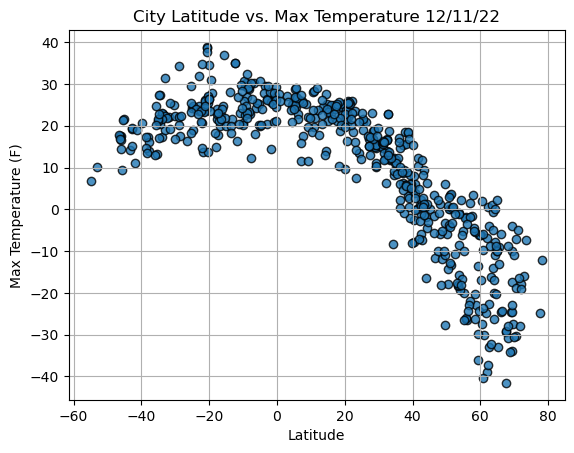

In [31]:
#Import time module
import time

#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Fig1.png")

#show plot
plt.show()

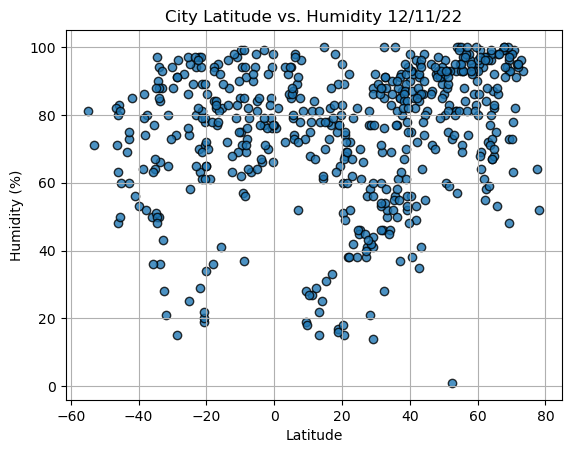

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

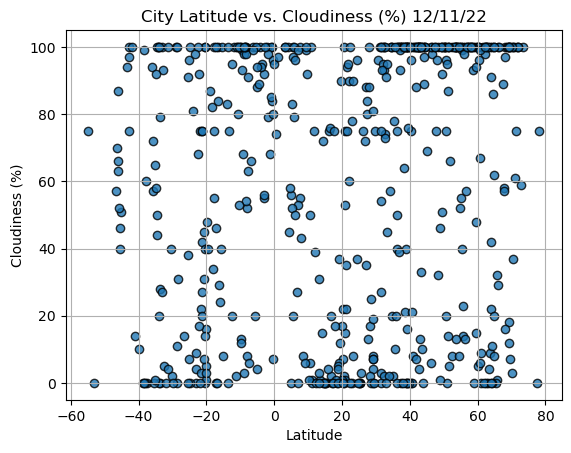

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

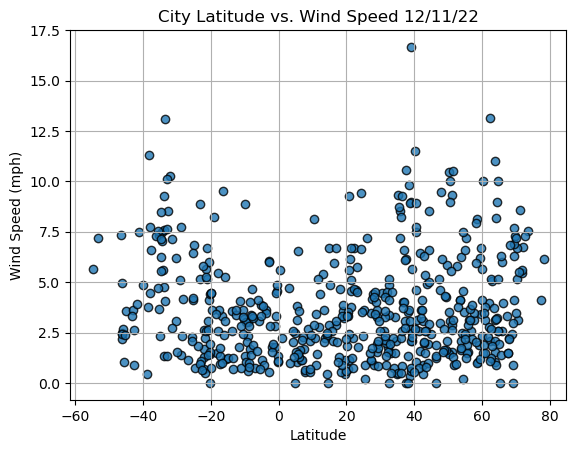

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [11]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [12]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                Sioux Lookout
Country                        CA
Date          2022-12-12 02:54:53
Lat                       50.1001
Lng                       -91.917
Max Temp                    -5.96
Humidity                       86
Cloudiness                    100
Wind Speed                   1.54
Name: 13, dtype: object

In [13]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Yellowknife,CA,2022-12-12 02:54:43,62.4560,-114.3525,-22.71,84,100,2.06
4,4,Nanortalik,GL,2022-12-12 02:54:45,60.1432,-45.2371,-6.12,80,5,2.31
7,7,Dikson,RU,2022-12-12 02:54:48,73.5069,80.5464,-7.38,93,100,7.56
12,12,Tura,IN,2022-12-12 02:54:52,25.5198,90.2201,20.84,61,3,0.18
13,13,Sioux Lookout,CA,2022-12-12 02:54:53,50.1001,-91.9170,-5.96,86,100,1.54


In [14]:
#create northern and southern hemisphere dataframs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

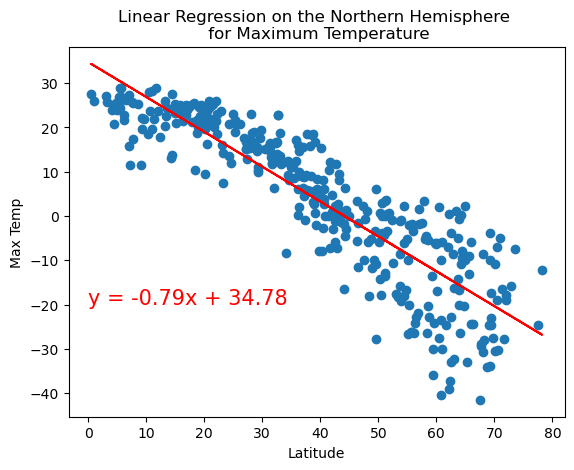

In [15]:
#Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (0,-20))

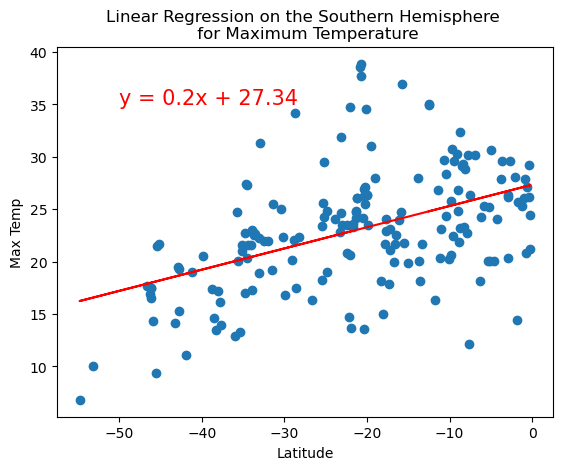

In [16]:
#Linear Regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,35))

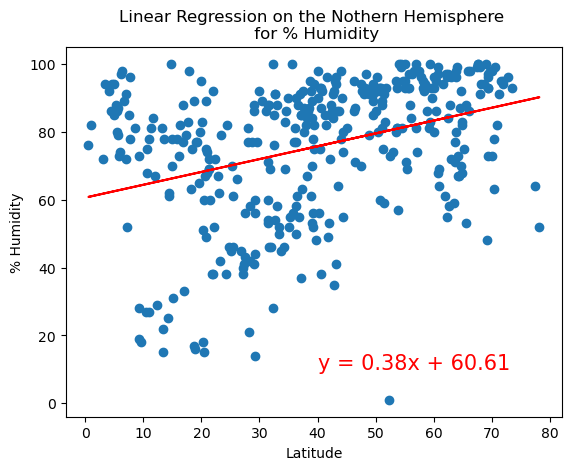

In [17]:
#Linear regression on the northern hemisphere - humidity

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Nothern Hemisphere \n for % Humidity', '% Humidity', (40,10))

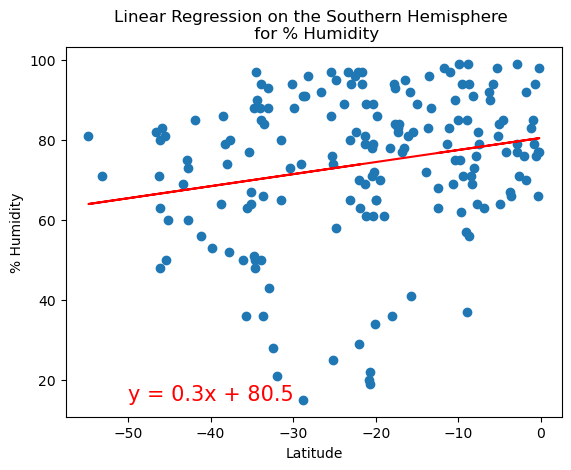

In [18]:
#Linear regression on the southern hemisphere - humidity

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-50,15))

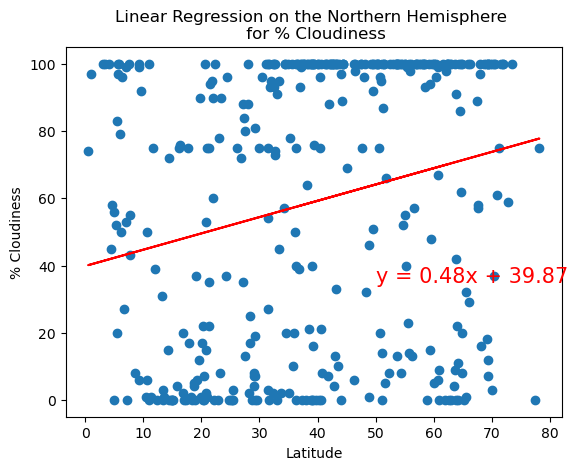

In [19]:
#Linear regression on the Northern hemisphere - cloudiness

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (50,35))

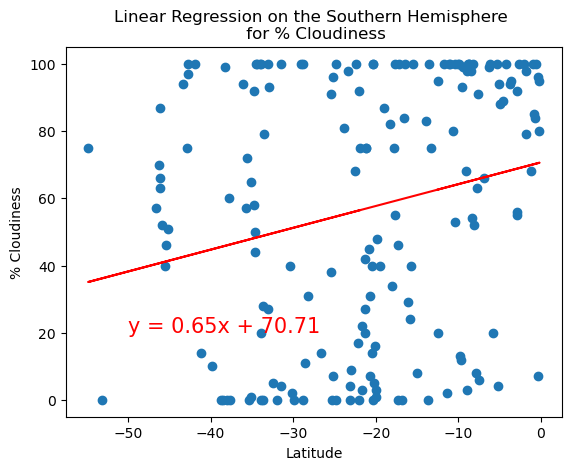

In [20]:
#Linear regression on the southern hemisphere -cloudiness

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,20))

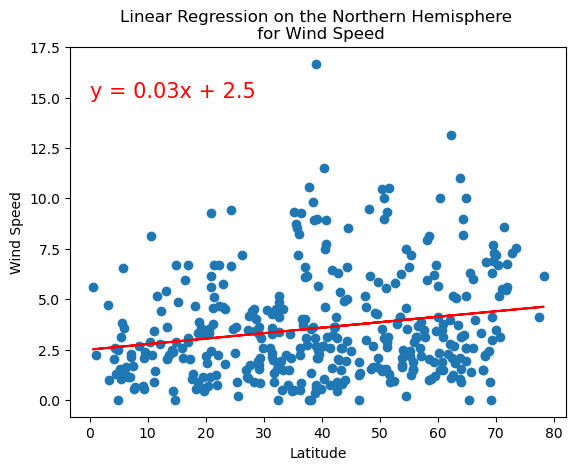

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,15))

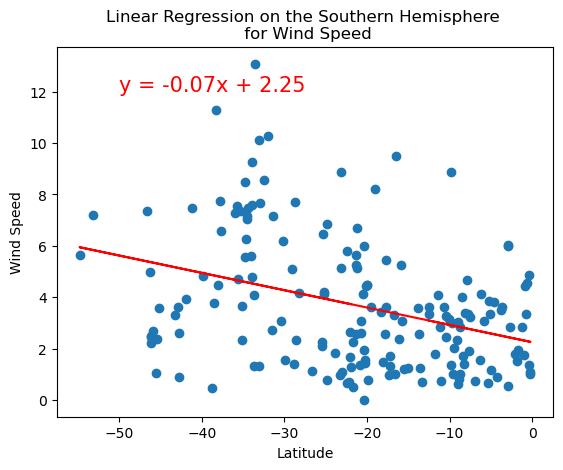

In [22]:
#Linear regression on the southern hemisphere -wind speed

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-50,12))